## CSEM_North_Atlantic
Details of the dataset:
- Name: 	CSEM_North_Atlantic
- Title: 	North Atlanticn part of the Collaborative Seismic Earth Model (version 2019.12.01)
- Type:	3-D Tomography Earth Model
- Sub Type: 	SH velocity, SV velocity
- Year	2019

Author(s):	
- Andreas Fichtner
  - ETH Zurich
  - Zurich, Switzerland
- Florian Rickers
  - Utrecht University
  - Utrecht, The Netherlands
- Lion Krischer
  - ETH Zurich
  - Zurich, Switzerland

Reference(s):	
- Fichtner, A., Trampert, J., Cupillard, P., Saygin, E., Taymaz, T., Capdeville, Y., Villasenor, A., 2013. Multi-scale full waveform inversion. Geophysical Journal International 194, 534-556.
- Fichtner, A., Bunge, H.-P., Igel, H., 2006. The adjoint method in seismology - I. Theory. Physics of the Earth and Planetary Interiors 157, 86-104.
- Fichtner, A., van Herwaarden, D.-P., Afanasiev, M., Simute, S., Krischer, L., Cubuk-Sabuncu, Y., Taymaz, T., Colli, L., Saygin, E., Villasenor, A., Trampert, J., Cupillard, P., Bunge, H.-P., Igel, H., 2018. The Collaborative Seismic Earth Model: Generation I. Geophysical Research Letters 45, doi: 10.1029/2018GL077338.
- Fichtner, A., Trampert, J., Cupillard, P., Saygin, E., Taymaz, T., Capdeville, Y., Villasenor, A., 2013. Multi-scale full waveform inversion. Geophysical Journal International 194, 534-556.
- Krischer, L., Igel, H., Fichtner, A., 2018. Automated large-scale full seismic waveform inversion for North America and the North Atlantic. Journal of Geophysical Research 123, doi: 10.1029/2017JB015289.
- Rickers, F., Fichtner, A., Trampert, J., 2013. The Iceland - Jan Mayen plume system and its impact on mantle dynamics in the North Atlantic region: Evidence from full-waveform inversion. Earth and Planetary Science Letters 367, 39-51.

DOI:	doi:10.17611/DP/18027471

Depth Coverage:	0.0 - 500.0 km

Areal Coverage:	Latitude: 20.0 to 75.0 Longitude: -55.0 to 10.0

Model Description	
  - CSEM_North_Atlantic (V. 2019.12.01) is the North Atlantic part of the Collaborative Seismic Earth Model (CSEM, Fichtner et al., 2018). It has been constructed using multi-scale full seismic waveform inversion, combining spectral-element waveform modelling and adjoint techniques, as described in Fichtner et al. (2006,2013). This submodel has been extracted from the variable-parameterisation CSEM onto a regular grid, readable by EMC tools. While having regional contributions from various sub-inversions, the structure in this model is dominated by the full-waveforms inversion described in Fichtner et al. (2013), Rickers et al. (2013), and Krischer et al. (2018).

Data Set Description	
  - Since the datasets included in the CSEM are too heterogeneous for a brief description, please see Fichtner et al. (2018) for details.

Web Page
- [cos.ethz.ch/research/CSEM.html](https://ds.iris.edu/spud/earthmodel/18027471)

EMC Page
- [ds.iris.edu/ds/products/emc-csem_north_atlantic/](http://ds.iris.edu/ds/products/emc-csem_north_atlantic)


## Step0: Downloading & Loading the Source Datasets

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

data_path = "../../../OpenSWI/Datasets/Original/OpenSWI-deep/csem-north-atlantic-2019.12.01.nc"

# load the .nc file
data = xr.open_dataset(data_path)

# print the keys of the dataset
print(data.keys())

KeysView(<xarray.Dataset>
Dimensions:    (depth: 51, latitude: 111, longitude: 131)
Coordinates:
  * depth      (depth) float32 0.0 10.0 20.0 30.0 ... 470.0 480.0 490.0 500.0
  * latitude   (latitude) float32 20.0 20.5 21.0 21.5 ... 73.5 74.0 74.5 75.0
  * longitude  (longitude) float32 -55.0 -54.5 -54.0 -53.5 ... 8.5 9.0 9.5 10.0
Data variables:
    vsv        (depth, latitude, longitude) float32 ...
    vsh        (depth, latitude, longitude) float32 ...
Attributes: (12/27)
    title:                         Collaborative Seismic Earth Model (CSEM) -...
    id:                            csem_north_atlantic
    reference:                     Fichtner et al., GRL (2018); Rickers et al...
    references:                    https://cos.ethz.ch/research/CSEM.html
    summary:                       CSEM extraction of the Alpine region
    keywords:                      Collaborative Seismic Earth Model, multi-s...
    ...                            ...
    geospatial_lon_units:          d

## Step 1: Velocity Profile Extracting
1. Extracting
2. De-duplicating

In [11]:
latitude = np.array(data['latitude'].values)
longitude = np.array(data['longitude'].values)
depth = np.array(data['depth'].values)
vsv = np.array(data['vsv'].values)
vsh = np.array(data['vsh'].values)

LON,LAT = np.meshgrid(longitude,latitude)


# print the shape of the dataset
print(latitude.shape,longitude.shape,depth.shape,vsv.shape,vsh.shape)


(111,) (131,) (51,) (51, 111, 131) (51, 111, 131)


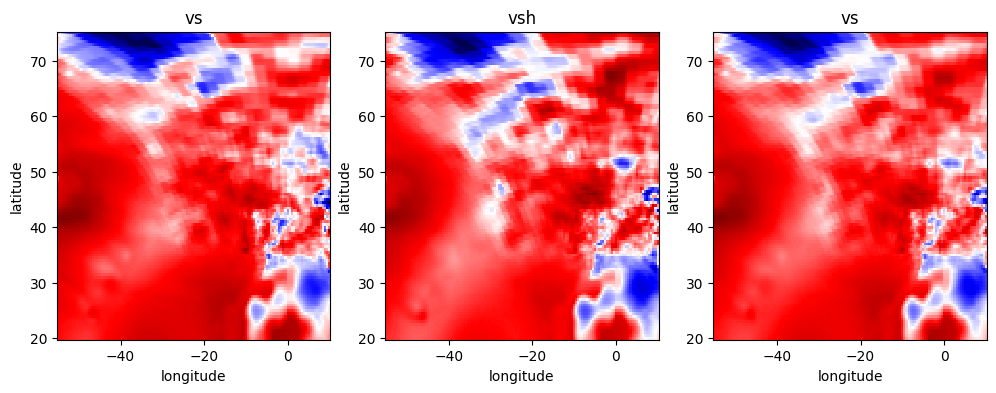

In [12]:
# average the vsv and vsh
vs = np.sqrt(vsv*vsh)

# plot the vs
fig,axs = plt.subplots(1,3,figsize=(12,4))
axs[0].pcolormesh(LON,LAT,vsv[4,:,:],cmap='seismic')
axs[0].set_title('vs')
axs[0].set_xlabel('longitude')
axs[0].set_ylabel('latitude')
axs[1].pcolormesh(LON,LAT,vsh[4,:,:],cmap='seismic')
axs[1].set_title('vsh')
axs[1].set_xlabel('longitude')
axs[1].set_ylabel('latitude')
axs[2].pcolormesh(LON,LAT,vs[4,:,:],cmap='seismic')
axs[2].set_title('vs')
axs[2].set_xlabel('longitude')
axs[2].set_ylabel('latitude')
plt.show()

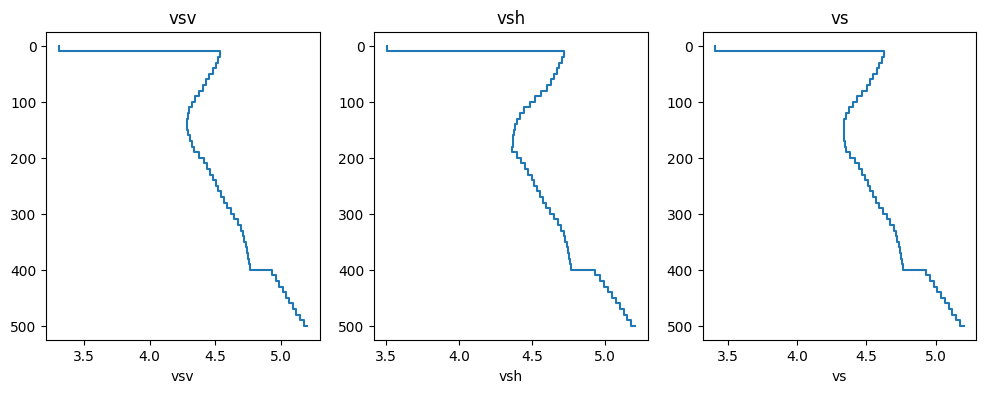

In [13]:
# single station comparsion
fig,axs = plt.subplots(1,3,figsize=(12,4))
axs[0].step(vsv[:,0,0],depth)
axs[0].set_title('vsv')
axs[0].set_xlabel('vsv')
axs[0].invert_yaxis()
axs[1].step(vsh[:,0,0],depth)
axs[1].set_title('vsh')
axs[1].set_xlabel('vsh')
axs[1].invert_yaxis()
axs[2].step(vs[:,0,0],depth)
axs[2].set_title('vs')
axs[2].set_xlabel('vs')
axs[2].invert_yaxis()
plt.show()

## Step 2: Quality Control & Interpolation

1. interpolation

2. rationalizing (remove the thin layers)


In [ ]:
import sys
sys.path.append('../../../')
from SWIDP.process_1d_deep import *
from SWIDP.dispersion import *

In [15]:
vs = vs.reshape(vs.shape[0],-1).T
vs.shape

(14541, 51)

In [16]:
# -------------------------------------------------------
#  interp to 1 km thickness
# -------------------------------------------------------
from scipy.interpolate import interp1d
max_depth = 300+0.1
depth_interp = np.concatenate([
    np.arange(0, max_depth, 1)
])
vs_models = vs_interp = np.zeros((vs.shape[0],depth_interp.shape[0]))
for i in range(vs.shape[0]):
    vs_temp = vs[i,:]
    depth_interp_temp = depth_interp[:np.argmin(np.abs(depth_interp-depth.max()))]
    f = interp1d(depth.reshape(-1),vs_temp,kind='nearest')
    vs_temp = f(depth_interp_temp)
    vs_interp[i,:len(vs_temp)] = vs_temp
vs_interp[:,len(vs_temp):] = vs_interp[:,len(vs_temp)-1].reshape(-1,1)
vs_interp.shape

(14541, 301)

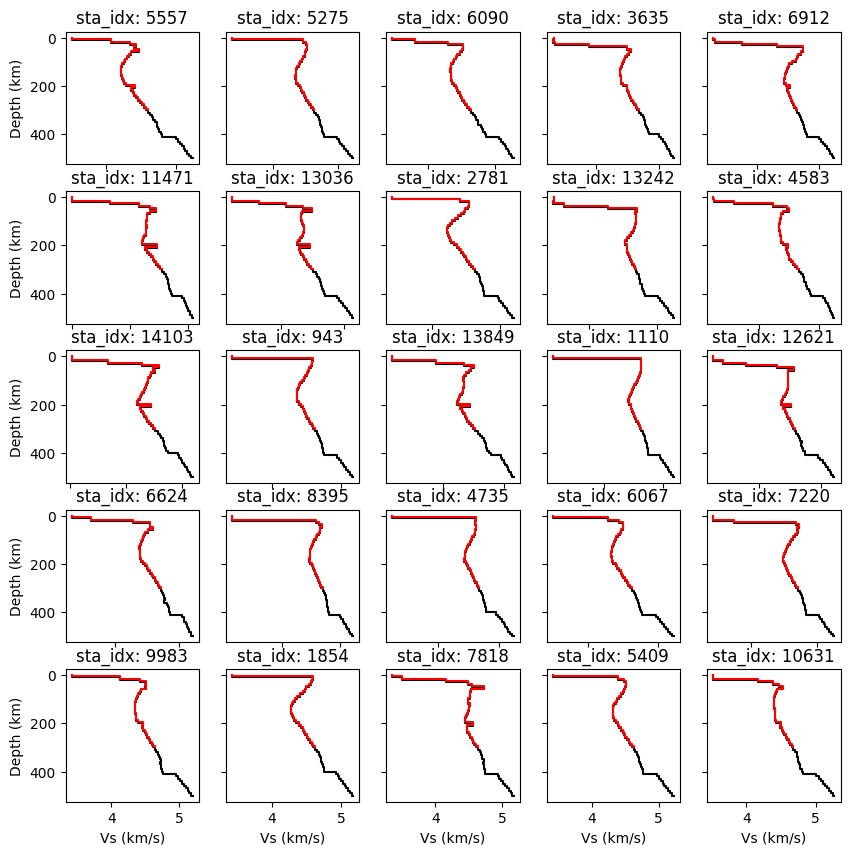

In [17]:
nrows = 5
ncols = 5
fig,axs = plt.subplots(nrows,ncols,figsize=(10,10))
for i in range(nrows):
    for j in range(ncols):
        sta_idx = np.random.randint(0,len(vs))
        axs[i,j].step(vs[sta_idx,:],depth,c='k')
        axs[i,j].step(vs_interp[sta_idx,:],depth_interp,c='r')
        axs[i,j].invert_yaxis()
        axs[i,j].set_title(f'sta_idx: {sta_idx}')
        if j == 0:
            axs[i,j].set_ylabel('Depth (km)')
        else:
            axs[i,j].tick_params(labelleft=False)
        if i == nrows-1:
            axs[i,j].set_xlabel('Vs (km/s)')
        else:
            axs[i,j].tick_params(labelbottom=False)
plt.show()

In [18]:
# -------------------------------------------------------
#  remove the sandwich layers
# -------------------------------------------------------
from p_tqdm import p_map
# process all the stations
vs_interp_rm_sandwich = p_map(combine_thin_sandwich,
                            vs_interp,
                            list(depth_interp.reshape(1,-1))*len(vs_interp),
                            [12]*len(vs_interp),
                            [1]*len(vs_interp),
                            [0.05]*len(vs_interp),
                            [False]*len(vs_interp))

# find the moho depth
vs_interp_rm_sandwich = np.array(vs_interp_rm_sandwich)
vs_interp_rm_sandwich.shape


  0%|          | 0/14541 [00:00<?, ?it/s]

(14541, 301)

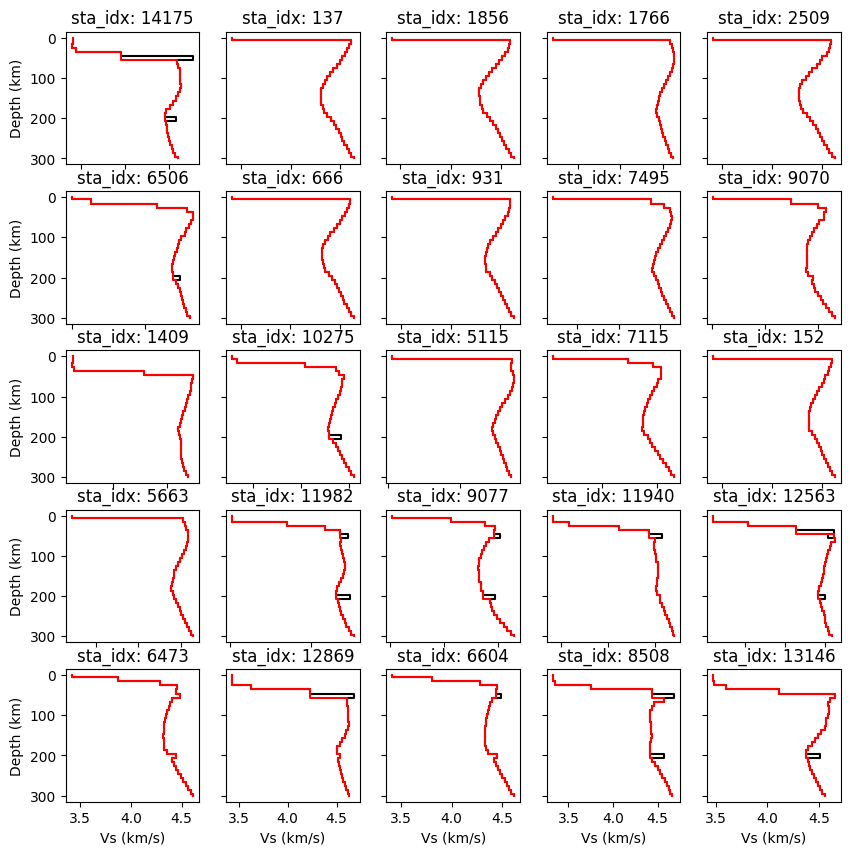

In [19]:
nrows = 5
ncols = 5
fig,axs = plt.subplots(nrows,ncols,figsize=(10,10))
for i in range(nrows):
    for j in range(ncols):
        sta_idx = np.random.randint(0,len(vs))
        axs[i,j].step(vs_interp[sta_idx,:],depth_interp,c='k')
        axs[i,j].step(vs_interp_rm_sandwich[sta_idx,:],depth_interp,c='r')
        axs[i,j].invert_yaxis()
        axs[i,j].set_title(f'sta_idx: {sta_idx}')
        if j == 0:
            axs[i,j].set_ylabel('Depth (km)')
        else:
            axs[i,j].tick_params(labelleft=False)
        if i == nrows-1:
            axs[i,j].set_xlabel('Vs (km/s)')
        else:
            axs[i,j].tick_params(labelbottom=False)
plt.show()

## Step 3: Dispersion Curve Forward Modeling

In [20]:
vs_models = vs_interp_rm_sandwich.reshape(-1,vs_interp_rm_sandwich.shape[-1]) # [n_models,n_depth]
depth_models = list(depth_interp.reshape(1,-1))*len(vs_models)
vel_models = p_map(transform_vs_to_vel_model,vs_models,depth_models)
vel_models = np.array(vel_models)
vel_models.shape

  0%|          | 0/14541 [00:00<?, ?it/s]

(14541, 301, 4)

In [21]:
# Calculate dispersion curves
t = generate_mixed_samples(num_samples=300,start=1,end=100,uniform_num=100,log_num=100,random_num=100)
t = np.ones((len(vel_models),len(t)))*t
disp_data = p_map(calculate_dispersion, vel_models, list(t))
disp_data = np.array(disp_data)
vel_models = np.array(vel_models)
vel_models.shape,disp_data.shape

  0%|          | 0/14541 [00:00<?, ?it/s]

((14541, 301, 4), (14541, 300, 3))

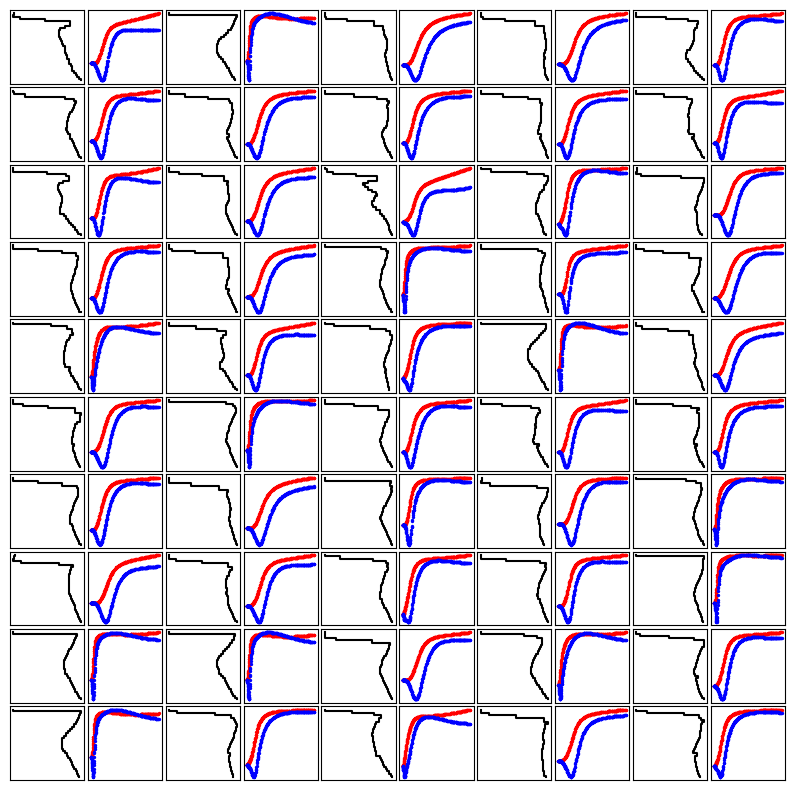

In [22]:
nrows = 10
ncols = 10
fig,axs = plt.subplots(nrows,ncols,figsize=(10,10))

for i in range(nrows):
    for j in range(ncols//2):

        sta_idx = np.random.randint(0,vel_models.shape[0])

        # velocity profile
        axs[i,j*2].step(vel_models[sta_idx][:,2],vel_models[sta_idx][:,0],c='k')
        axs[i,j*2].set_xticks([])
        axs[i,j*2].set_yticks([])
        axs[i,j*2].invert_yaxis()

        # dispersion curve
        axs[i,j*2+1].scatter(disp_data[sta_idx][:,0],disp_data[sta_idx][:,1],s=2,c='r')
        axs[i,j*2+1].scatter(disp_data[sta_idx][:,0],disp_data[sta_idx][:,2],s=2,c='b')
        axs[i,j*2+1].set_xticks([])
        axs[i,j*2+1].set_yticks([])
plt.subplots_adjust(wspace=0.05,hspace=0.05)
plt.show()

In [23]:
phase_mask = np.sum(disp_data[:,:,1] == 0,axis=1)==0
group_mask = np.sum(disp_data[:,:,2] == 0,axis=1)==0
mask = phase_mask*group_mask

loc = np.hstack((LON.reshape(-1,1),LAT.reshape(-1,1)))[mask,:]
vel_models = vel_models[mask,:,:]
disp_data = disp_data[mask,:,:]

In [ ]:
import os
save_base_path = "../../../OpenSWI/Datasets/OpenSWI-deep/1s-100s-Base"
# Save processed data as compressed npz files
np.savez_compressed(os.path.join(save_base_path, "CSEM_North_Atlantic_loc.npz"),
                    data=loc.astype(np.float32))
np.savez_compressed(os.path.join(save_base_path, "CSEM_North_Atlantic_model.npz"),
                    data=vel_models.astype(np.float32))
np.savez_compressed(os.path.join(save_base_path, "CSEM_North_Atlantic_disp.npz"),
                    data=disp_data.astype(np.float32))

(array([69., 36., 30., 24., 22., 26., 17., 27., 27., 22.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

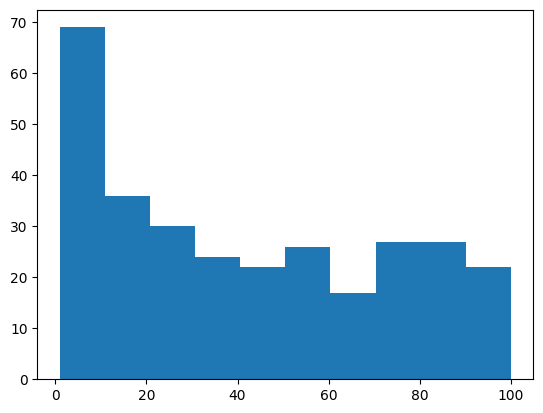

In [25]:
plt.hist(disp_data[0,:,0])